In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

tsunami_dataset = "Tsunami.csv"

In [40]:
tsunami_df = pd.read_csv(tsunami_dataset)

# Use a list to select columns
tsunami_df = tsunami_df[
    [
        "Year",
        "Mo",
        "Dy",
        "Hr",
        "Mn",
        "Sec",
        "Tsunami Event Validity",
        "Tsunami Cause Code",
        "Earthquake Magnitude",
        "Vol",
        "Latitude",
        "Longitude",
        "Country",
        "Location Name",
        "Maximum Water Height (m)",
        "Number of Runups",
        "Tsunami Magnitude (Abe)",
        "Tsunami Magnitude (Iida)",
    ]
].dropna(
    subset=[
        "Year",
        "Mo",
        "Dy",
        "Hr",
        "Mn",
        "Sec",
        "Tsunami Event Validity",
        "Earthquake Magnitude",
        "Latitude",
        "Longitude",
    ]
)


print("Preprocessed DataFrame shape:", tsunami_df.shape)
print(tsunami_df.head())

Preprocessed DataFrame shape: (1025, 18)
        Year   Mo    Dy    Hr    Mn   Sec  Tsunami Event Validity  \
786   1839.0  1.0  11.0   9.0  55.0   0.0                     3.0   
1292  1886.0  9.0   1.0   2.0  51.0   0.0                     4.0   
1345  1893.0  6.0   4.0   2.0  27.0   0.0                     4.0   
1389  1897.0  6.0  12.0  11.0   6.0  46.0                     3.0   
1391  1897.0  8.0   5.0   0.0  10.0   0.0                     4.0   

      Tsunami Cause Code  Earthquake Magnitude  Vol  Latitude  Longitude  \
786                  1.0                   7.8  NaN      14.9      -60.6   
1292                 1.0                   7.3  NaN      32.9      -80.0   
1345                 1.0                   7.0  NaN      43.3      147.5   
1389                 1.0                   8.0  NaN      26.0       90.7   
1391                 1.0                   7.7  NaN      38.0      143.7   

                            Country     Location Name  \
786   MARTINIQUE (FRENCH TERRI

Number of Runups Statistics:
count    1025.000000
mean       26.932683
std       225.298999
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      6421.000000
Name: Number of Runups, dtype: float64

Unique values: 108


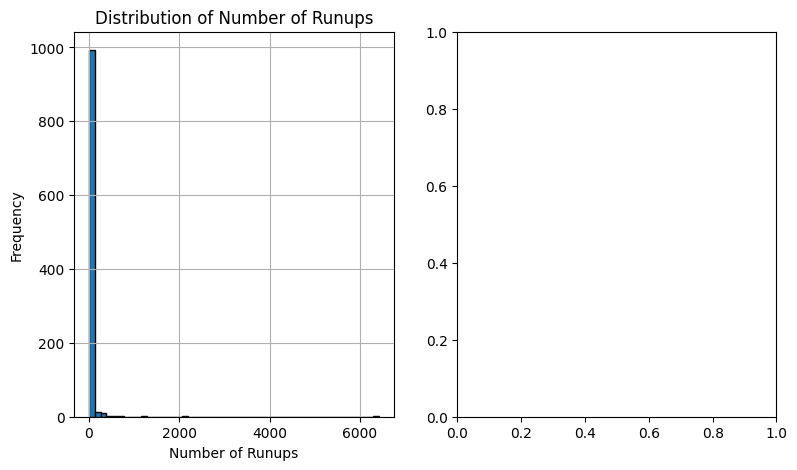

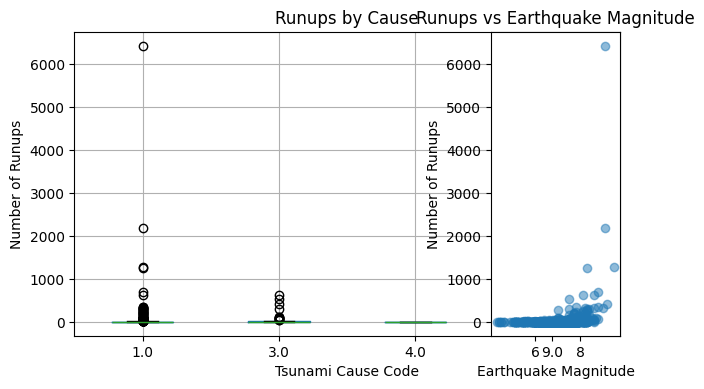


Correlations with Number of Runups:
Earthquake Magnitude: 0.212
Vol: -0.198
Latitude: 0.022
Longitude: 0.008
Year: 0.064


In [41]:
print("Number of Runups Statistics:")
print(tsunami_df["Number of Runups"].describe())
print(f"\nUnique values: {tsunami_df['Number of Runups'].nunique()}")

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
tsunami_df["Number of Runups"].hist(bins=50, edgecolor="black")
plt.xlabel("Number of Runups")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Runups")

plt.subplot(1, 3, 2)
tsunami_df.boxplot(column="Number of Runups", by="Tsunami Cause Code")
plt.xlabel("Tsunami Cause Code")
plt.ylabel("Number of Runups")
plt.title("Runups by Cause")
plt.suptitle("")

plt.subplot(1, 3, 3)
plt.scatter(
    tsunami_df["Earthquake Magnitude"], tsunami_df["Number of Runups"], alpha=0.5
)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Number of Runups")
plt.title("Runups vs Earthquake Magnitude")

plt.tight_layout()
plt.show()

numeric_cols = ["Earthquake Magnitude", "Vol", "Latitude", "Longitude", "Year"]
print("\nCorrelations with Number of Runups:")
for col in numeric_cols:
    if col in tsunami_df.columns:
        corr = tsunami_df[[col, "Number of Runups"]].corr().iloc[0, 1]
        print(f"{col}: {corr:.3f}")

In [42]:
features = [
    "Year",
    "Mo",
    "Dy",
    "Hr",
    "Mn",
    "Sec",
    "Tsunami Event Validity",
    "Tsunami Cause Code",
    "Earthquake Magnitude",
    "Vol",
    "Latitude",
    "Longitude",
]

X = tsunami_df[features].fillna(0)
y = np.log1p(tsunami_df["Number of Runups"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target is now log-transformed (log1p)")

Training set: (820, 12)
Test set: (205, 12)
Target is now log-transformed (log1p)


In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "predictions": y_pred}

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")


Linear Regression:
  RMSE: 0.9645
  MAE: 0.7413
  R² Score: 0.3196

Random Forest:
  RMSE: 0.8462
  MAE: 0.6187
  R² Score: 0.4763

Gradient Boosting:
  RMSE: 0.8414
  MAE: 0.6132
  R² Score: 0.4821



Best Model: Gradient Boosting
R² Score: 0.4821

Top 5 Most Important Features:
                   feature  importance
8     Earthquake Magnitude    0.470013
6   Tsunami Event Validity    0.206242
0                     Year    0.116919
10                Latitude    0.070436
11               Longitude    0.046197


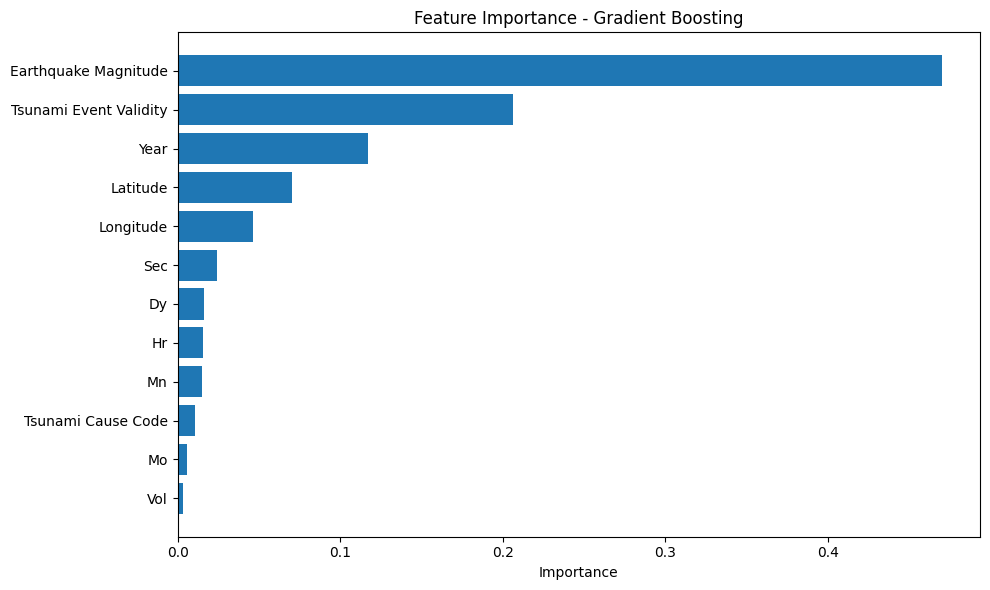

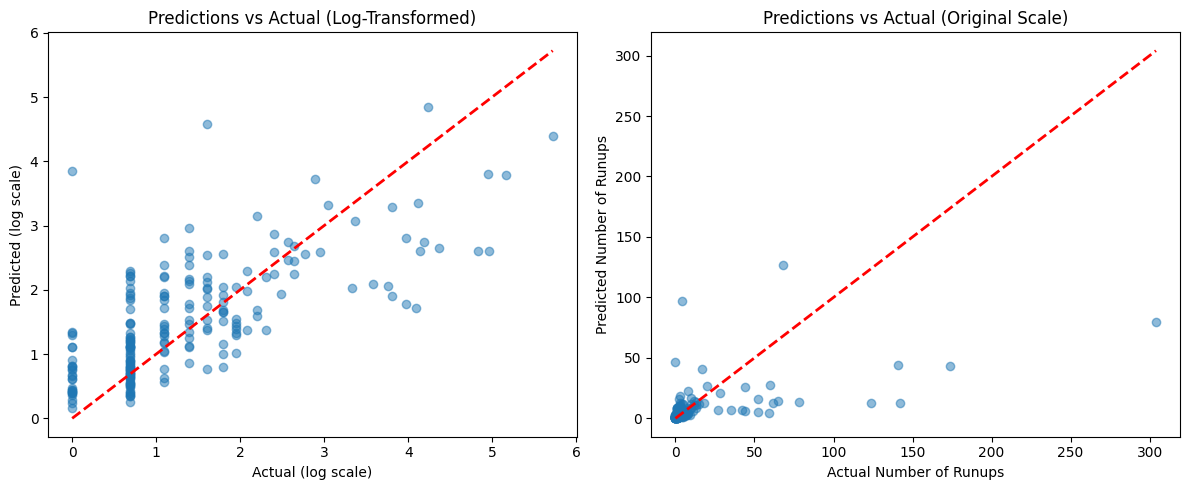


Original Scale Metrics:
  RMSE: 26.5243
  MAE: 8.7891


In [44]:
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")

if best_model_name != "Linear Regression":
    feature_importance = pd.DataFrame(
        {"feature": features, "importance": best_model.feature_importances_}
    ).sort_values("importance", ascending=False)

    print(f"\nTop 5 Most Important Features:")
    print(feature_importance.head())

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance["feature"], feature_importance["importance"])
    plt.xlabel("Importance")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

y_pred_original = np.expm1(results[best_model_name]["predictions"])
y_test_original = np.expm1(y_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, results[best_model_name]["predictions"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual (log scale)")
plt.ylabel("Predicted (log scale)")
plt.title("Predictions vs Actual (Log-Transformed)")

plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([0, y_test_original.max()], [0, y_test_original.max()], "r--", lw=2)
plt.xlabel("Actual Number of Runups")
plt.ylabel("Predicted Number of Runups")
plt.title("Predictions vs Actual (Original Scale)")

plt.tight_layout()
plt.show()

print(f"\nOriginal Scale Metrics:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_original, y_pred_original)):.4f}")
print(f"  MAE: {mean_absolute_error(y_test_original, y_pred_original):.4f}")